In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [17]:
type(data)

dict

In [18]:
import pandas as pd



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [19]:
import pandas as pd


pd.set_option('display.max_rows', None)

In [20]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962688e+07,1.962688e+07,False,NaN,1,NaN,NaN,None,2024-02-13T17:03:00.000Z,48503.468375,3.840833e+10,36.9267,-0.510439,-2.245338,12.504043,12.980642,15.869045,33.397763,9.519715e+11,52.1329,1.018573e+12,None,2024-02-13T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
1,1027,Ethereum,ETH,ethereum,8405,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201682e+08,1.201682e+08,True,NaN,2,NaN,NaN,None,2024-02-13T17:03:00.000Z,2607.451272,2.275908e+10,153.7497,-1.025990,2.007406,11.198307,3.173899,16.373260,29.633814,3.133327e+11,17.1494,3.133327e+11,None,2024-02-13T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
2,825,Tether USDt,USDT,tether,74605,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.666834e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-13T17:02:00.000Z,1.000159,6.546065e+10,63.3200,-0.002537,-0.015684,0.065051,0.029045,0.047122,-0.031871,9.668370e+10,5.2917,9.961646e+10,None,2024-02-13T17:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-13 17:05:42.627338
3,1839,BNB,BNB,bnb,2061,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495451e+08,1.495451e+08,False,NaN,4,NaN,NaN,None,2024-02-13T17:02:00.000Z,320.823102,1.050923e+09,36.0985,-0.450150,-0.465438,6.101685,5.128103,30.428403,27.042766,4.797751e+10,2.6274,4.797751e+10,None,2024-02-13T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.373074e+08,5.693734e+08,True,NaN,5,NaN,NaN,None,2024-02-13T17:03:00.000Z,108.611409,3.025967e+09,55.1845,-1.594706,-0.073523,14.092075,6.934437,46.778233,75.247393,4.749657e+10,2.6011,6.184045e+10,None,2024-02-13T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-13T17:03:00.000Z,0.519752,1.117237e+09,30.7782,-0.018479,-1.525457,3.204472,-10.079928,-16.302726,-18.501760,2.833010e+10,1.5514,5.197519e+10,None,2024-02-13T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
6,3408,USDC,USDC,usd-coin,16684,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.783895e+10,2.783895e+10,False,NaN,7,NaN,NaN,None,2024-02-13T17:03:00.000Z,0.999997,7.358464e+09,38.7251,-0.034203,0.002920,-0.021593,-0.019699,-0.002157,-0.024404,2.783885e+10,1.5245,2.783885e+10,None,2024-02-13T17:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-13 17:05:42.627338
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.544828e+10,3.661393e+10,False,NaN,8,NaN,NaN,None,2024-02-13T17:02:00.000Z,0.536490,5.488565e+08,38.4280,-0.673044,-3.066414,8.101142,-1.511274,-13.432231,44.912985,1.901764e+10,1.0415,2.414204e+10,None,2024-02-13T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:05:42.627338
8,5805,Avalanche,AVAX,avalanche,662,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

In [117]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
   
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    

In [118]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) 
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [119]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19626875.00000,19626875.00000,False,NaN,1,NaN,NaN,None,2024-02-13T17:56:00.000Z,48813.72964,36328405503.49179,17.36280,0.35053,-2.18956,13.07014,13.72212,16.61197,33.79865,958060969874.37915,52.17990,1025088322382.55005,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
1,1027,Ethereum,ETH,ethereum,8405,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120168171.74402,120168171.74402,True,NaN,2,NaN,NaN,None,2024-02-13T17:56:00.000Z,2614.82139,21728667586.98231,110.66900,0.02217,0.23613,11.17387,3.39602,17.19645,29.90712,314218305786.43628,17.11490,314218305786.44000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
2,825,Tether USDt,USDT,tether,74605,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,None,2024-02-13T17:55:00.000Z,1.00027,62427945888.17487,42.13070,0.01586,-0.01786,0.06183,0.02716,0.04157,-0.01128,96694233567.18738,5.26750,99627310127.92000,None,2024-02-13T17:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-13 17:57:26.137191
3,1839,BNB,BNB,bnb,2061,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149545061.63612,149545061.63612,False,NaN,4,NaN,NaN,None,2024-02-13T17:55:00.000Z,322.25126,1038941603.03785,28.99590,0.20884,-0.54638,6.57417,5.21503,31.02224,27.82578,48191084430.47765,2.62470,48191084430.48000,None,2024-02-13T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437307366.55316,569373435.97494,True,NaN,5,NaN,NaN,None,2024-02-13T17:56:00.000Z,110.12644,2915380187.04734,34.08840,0.93670,-0.04306,15.17553,9.54315,46.44101,78.45877,48159101835.84823,2.62290,62703067414.28000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,None,2024-02-13T17:56:00.000Z,0.52366,1096451829.83126,20.54270,0.63227,-1.64068,3.86734,-9.88248,-15.70320,-17.51812,28542996079.65404,1.55460,52365773648.06000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
6,3408,USDC,USDC,usd-coin,16685,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27838950406.99062,27838950406.99062,False,NaN,7,NaN,NaN,None,2024-02-13T17:56:00.000Z,1.00009,7160868948.67148,25.22770,-0.04805,-0.00043,0.00374,-0.01039,-0.01607,-0.01276,27841590406.23224,1.51640,27841590406.23000,None,2024-02-13T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-13 17:57:26.137191
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35448278328.77000,36613928911.92100,False,NaN,8,NaN,NaN,None,2024-02-13T17:55:00.000Z,0.54006,526718438.21402,23.11490,0.43972,-4.17558,8.37569,-1.15719,-12.55673,45.98770,19144363114.64649,1.04270,24302910628.52000,None,2024-02-13T17:55:00.000Z,N

In [124]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [125]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19626875.00000,19626875.00000,False,NaN,1,NaN,NaN,None,2024-02-13T17:56:00.000Z,48813.72964,36328405503.49179,17.36280,0.35053,-2.18956,13.07014,13.72212,16.61197,33.79865,958060969874.37915,52.17990,1025088322382.55005,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
1,1027,Ethereum,ETH,ethereum,8405,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120168171.74402,120168171.74402,True,NaN,2,NaN,NaN,None,2024-02-13T17:56:00.000Z,2614.82139,21728667586.98231,110.66900,0.02217,0.23613,11.17387,3.39602,17.19645,29.90712,314218305786.43628,17.11490,314218305786.44000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
2,825,Tether USDt,USDT,tether,74605,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,None,2024-02-13T17:55:00.000Z,1.00027,62427945888.17487,42.13070,0.01586,-0.01786,0.06183,0.02716,0.04157,-0.01128,96694233567.18738,5.26750,99627310127.92000,None,2024-02-13T17:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-13 17:57:26.137191
3,1839,BNB,BNB,bnb,2061,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149545061.63612,149545061.63612,False,NaN,4,NaN,NaN,None,2024-02-13T17:55:00.000Z,322.25126,1038941603.03785,28.99590,0.20884,-0.54638,6.57417,5.21503,31.02224,27.82578,48191084430.47765,2.62470,48191084430.48000,None,2024-02-13T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437307366.55316,569373435.97494,True,NaN,5,NaN,NaN,None,2024-02-13T17:56:00.000Z,110.12644,2915380187.04734,34.08840,0.93670,-0.04306,15.17553,9.54315,46.44101,78.45877,48159101835.84823,2.62290,62703067414.28000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,None,2024-02-13T17:56:00.000Z,0.52366,1096451829.83126,20.54270,0.63227,-1.64068,3.86734,-9.88248,-15.70320,-17.51812,28542996079.65404,1.55460,52365773648.06000,None,2024-02-13T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-13 17:57:26.137191
6,3408,USDC,USDC,usd-coin,16685,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27838950406.99062,27838950406.99062,False,NaN,7,NaN,NaN,None,2024-02-13T17:56:00.000Z,1.00009,7160868948.67148,25.22770,-0.04805,-0.00043,0.00374,-0.01039,-0.01607,-0.01276,27841590406.23224,1.51640,27841590406.23000,None,2024-02-13T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-13 17:57:26.137191
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35448278328.77000,36613928911.92100,False,NaN,8,NaN,NaN,None,2024-02-13T17:55:00.000Z,0.54006,526718438.21402,23.11490,0.43972,-4.17558,8.37569,-1.15719,-12.55673,45.98770,19144363114.64649,1.04270,24302910628.52000,None,2024-02-13T17:55:00.000Z,N

In [126]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.76119,-2.02811,13.24542,13.87195,16.83125,34.00438
Ethereum,0.42454,0.43560,11.35207,3.58549,17.45090,30.16907
Tether USDt,0.01055,-0.01071,0.06897,0.04463,0.04941,-0.01088
BNB,0.47990,-0.43797,6.63987,5.29930,31.04462,28.10355
Solana,1.36393,0.21214,15.03332,9.49779,46.85929,78.97961
XRP,0.78601,-1.51953,3.92691,-10.05865,-15.58634,-17.37855
USDC,-0.00832,-0.00068,-0.00252,-0.00795,-0.02003,-0.01151
Cardano,0.66098,-4.05051,8.47398,-1.11029,-12.51757,46.41221
Avalanche,1.03106,-3.42416,15.46276,5.93237,-1.39012,94.54064


In [127]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.76119
             quote.USD.percent_change_24h    -2.02811
             quote.USD.percent_change_7d     13.24542
             quote.USD.percent_change_30d    13.87195
             quote.USD.percent_change_60d    16.83125
             quote.USD.percent_change_90d    34.00438
Ethereum     quote.USD.percent_change_1h      0.42454
             quote.USD.percent_change_24h     0.43560
             quote.USD.percent_change_7d     11.35207
             quote.USD.percent_change_30d     3.58549
             quote.USD.percent_change_60d    17.45090
             quote.USD.percent_change_90d    30.16907
Tether USDt  quote.USD.percent_change_1h      0.01055
             quote.USD.percent_change_24h    -0.01071
             quote.USD.percent_change_7d      0.06897
             quote.USD.percent_change_30d     0.04463
             quote.USD.percent_change_60d     0.04941
             quote.USD.percent_change_90

In [128]:
type(df4)

pandas.core.series.Series

In [129]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.76119
            quote.USD.percent_change_24h  -2.02811
            quote.USD.percent_change_7d   13.24542
            quote.USD.percent_change_30d  13.87195
            quote.USD.percent_change_60d  16.83125
            quote.USD.percent_change_90d  34.00438
Ethereum    quote.USD.percent_change_1h    0.42454
            quote.USD.percent_change_24h   0.43560
            quote.USD.percent_change_7d   11.35207
            quote.USD.percent_change_30d   3.58549
            quote.USD.percent_change_60d  17.45090
            quote.USD.percent_change_90d  30.16907
Tether USDt quote.USD.percent_change_1h    0.01055
            quote.USD.percent_change_24h  -0.01071
            quote.USD.percent_change_7d    0.06897
            quote.USD.percent_change_30d   0.04463
            quote.USD.percent_change_60d   0.04941
            quote.USD.percent_change_90d  -0.01088
BNB         quote.USD.percent_change_1h    0.47990
            quote.USD.percent_change_24h  -0.43797
            quote.USD.percent_change_7d    6.63987
            quote.USD.percent_change_30d   5.29930
            quote.USD.percent_change_60d  31.04462
            quote.USD.percent_change_90d  28.10355
Solana      quote.USD.percent_change_1h    1.36393
            quote.USD.percent_change_24h   0.21214
            quote.USD.percent_change_7d   15.03332
            quote.USD.percent_change_30d   9.49779
            quote.USD.percent_change_60d  46.85929
            quote.USD.percent_change_90d  78.97961
XRP         quote.USD.percent_change_1h    0.78601
            quote.USD.percent_change_24h  -1.51953
            quote.USD.percent_change_7d    3.92691
            quote.USD.percent_change_30d -10.05865
            quote.USD.percent_change_60d -15.58634
            quote.USD.percent_change_90d -17.37855
USDC        quote.USD.percent_change_1h   -0.00832
            quote.USD.percent_change_24h  -0.00068
            quote.USD.percent_change_7d   -0.00252
            quote.USD.percent_change_30d  -0.00795
            quote.USD.percent_change_60d  -0.02003
            quote.USD.percent_change_90d  -0.01151
Cardano     quote.USD.percent_change_1h    0.66098
            quote.USD.percent_change_24h  -4.05051
            quote.USD.percent_change_7d    8.47398
            quote.USD.percent_change_30d  -1.11029
            quote.USD.percent_change_60d -12.51757
            quote.USD.percent_change_90d  46.41221
Avalanche   quote.USD.percent_change_1h    1.03106
            quote.USD.percent_change_24h  -3.42416
            quote.USD.percent_change_7d   15.46276
            quote.USD.percent_change_30d   5.93237
            quote.USD.percent_change_60d  -1.39012
            quote.USD.percent_change_90d  94.54064
Dogecoin    quote.USD.percent_change_1h    0.40084
            quote.USD.percent_change_24h  -1.84767
            quote.USD.percent_change_7d    2.64337
            quote.USD.percent_change_30d  -1.15685
            quote.USD.percent_change_60d -14.29987
            quote.USD.percent_change_90d   9.20759
Chainlink   quote.USD.percent_change_1h    0.00865
            quote.USD.percent_change_24h  -5.04902
            quote.USD.percent_change_7d    5.03339
            quote.USD.percent_change_30d  29.00874
            quote.USD.percent_change_60d  33.46096
            quote.USD.percent_change_90d  32.67143
TRON        quote.USD.percent_change_1h    0.24872
            quote.USD.percent_change_24h   0.16635
            quote.USD.percent_change_7d    2.85056
            quote.USD.percent_change_30d  10.57772
            quote.USD.percent_change_60d  22.01846
            quote.USD.percent_change_90d  21.58979
Polkadot    quote.USD.percent_change_1h    0.59072
            quote.USD.percent_change_24h  -1.96348
            quote.USD.percent_change_7d    7.13829
            quote.USD.percent_change_30d  -5.62789
            quote.USD.percent_change_60d   1.70509
            quo

In [130]:
df5.count()

values    90
dtype: int64

In [131]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.76119
1,Bitcoin,quote.USD.percent_change_24h,-2.02811
2,Bitcoin,quote.USD.percent_change_7d,13.24542
3,Bitcoin,quote.USD.percent_change_30d,13.87195
4,Bitcoin,quote.USD.percent_change_60d,16.83125
5,Bitcoin,quote.USD.percent_change_90d,34.00438
6,Ethereum,quote.USD.percent_change_1h,0.42454
7,Ethereum,quote.USD.percent_change_24h,0.43560
8,Ethereum,quote.USD.percent_change_7d,11.35207
9,Ethereum,quote.USD.percent_change_30d,3.58549


In [132]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.76119
1,Bitcoin,quote.USD.percent_change_24h,-2.02811
2,Bitcoin,quote.USD.percent_change_7d,13.24542
3,Bitcoin,quote.USD.percent_change_30d,13.87195
4,Bitcoin,quote.USD.percent_change_60d,16.83125
5,Bitcoin,quote.USD.percent_change_90d,34.00438
6,Ethereum,quote.USD.percent_change_1h,0.42454
7,Ethereum,quote.USD.percent_change_24h,0.43560
8,Ethereum,quote.USD.percent_change_7d,11.35207
9,Ethereum,quote.USD.percent_change_30d,3.58549


In [133]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.76119
1,Bitcoin,24h,-2.02811
2,Bitcoin,7d,13.24542
3,Bitcoin,30d,13.87195
4,Bitcoin,60d,16.83125
5,Bitcoin,90d,34.00438
6,Ethereum,1h,0.42454
7,Ethereum,24h,0.43560
8,Ethereum,7d,11.35207
9,Ethereum,30d,3.58549


In [139]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,48813.72964,2024-02-13 17:57:26.137191
0,Bitcoin,48813.72964,2024-02-13 17:57:26.137191
0,Bitcoin,48870.91638,2024-02-13 18:01:52.773510
0,Bitcoin,48907.77078,2024-02-13 18:02:53.662834
0,Bitcoin,48925.89884,2024-02-13 18:03:54.519521
0,Bitcoin,48962.35635,2024-02-13 18:04:55.502548
0,Bitcoin,48980.28193,2024-02-13 18:05:55.970596
0,Bitcoin,48961.50192,2024-02-13 18:06:56.769662
0,Bitcoin,48995.45614,2024-02-13 18:07:57.808364


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt


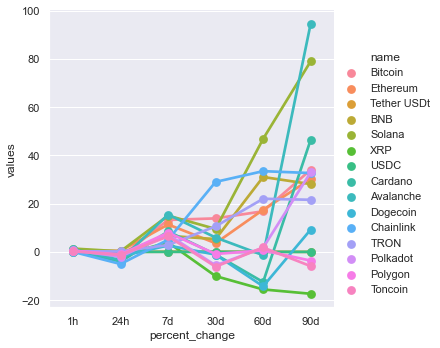

In [135]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')